# Prerequisite test

### Question 1

1. We would require (n * k * m)  multiplications, and (n * k-1 * m) additions.<br>
2. After matrix multiplication is done, we get a (n x m) matrix. <br>
3. We can say the number of operations performed to obtain any element of the (n x m) is same. <br>
4. Therefore, for each element formed, k elements of one row and k elements of one column are involved.<br>
5. We get k multiplications and k-1 additions.<br>
6. Therefore, in total, (n * k * m)  multiplications, and (n * k-1 * m) additions.<br>

### Question2

In [483]:
from random import randint
import random
import numpy as np
import time 

In [484]:
#initializing the matrices, and dimensions
n = 25
k = 20
m = 30
M1 = [[randint(0,50) for _ in range(k)] for j in range(n) ]
M2 = [[randint(0,50) for _ in range(m)] for j in range(k) ]
# print(M1)
# print(M2)

In [485]:
#calculating the time taken for explict matrix multiplication
def my_matmul() :
    begin1 = time.time()
    res = [[0 for i in range(m)] for j in range(n) ] 
    for i in range(n) :
        for j in range(m) :
            elem = 0 ;
            for w in range(k) :
                elem +=  M1[i][w] * M2[w][j] 
            res[i][j]= elem 
    end1 = time.time()
    return end1-begin1 

# print("time taken: ",-begin1+end1) 
# print("result",res)

#calculating the time taken for numpy matrix multiplication
N1 = np.array(M1)
N2 = np.array(M2)
def np_matmul() :
    begin2 = time.time()
    ans = np.matmul(N1,N2)
    end2 = time.time()
#     print(end2-begin2)
    return end2-begin2

# print("time taken: ",-begin2+end2) 
# print("result",ans)

In [486]:
N = 1000#Number of experiments
# q = np.sqrt(N,dtype = int)
np_time = np.zeros(N, float)
my_time = np.zeros(N,float) 
for i in range(N) :
    my_time[i]= my_matmul()
    np_time[i]= np_matmul()
    
# print(my_time)
# print(np_time)
my_avg = np.mean(my_time)
np_avg = np.mean(np_time)

my_std = np.std(my_time)
np_std = np.std(np_time)

print("my algorithm average time: ",my_avg)
print("numpy algorithm average time: ",np_avg)
print("my algorithm standard deviation : ",my_std)
print("numpy algorithm standard deviation: ",np_std)

my algorithm average time:  0.0016151940822601318
numpy algorithm average time:  2.031135559082031e-05
my algorithm standard deviation :  0.00010129912270104505
numpy algorithm standard deviation:  1.920561790223611e-05


If we compare the time taken $+/-$ respective standard deviation, it is clear that numpy is faster. Also, the standard deviation is quite similar.<br> 
The reasons are as follows:<br>
1. Numpy array stores similar data type elements in contiguous memory, whereas python lists store different data types in non-contiguous memory locations. So, retrival of data is bit faster in numpy arrays.
2. Numpy package breaks the required task into multiple fragments, and execute things concurrently.
3. Numpy core package is built using C, C++, and other languages which are faster than python.


### Question 3

1. The time complexity using the method given in the question would be $O(n^{2})$. 
2. The better way could be sorting the array and extracting the median accordingly. This method takes $O(n\log{n}) $.


In [487]:
import time 
import sys

In [488]:
N = 50
ar = [randint(0,50) for i in range(N)]
def que_median() :
    begin = time.time()
    mid1 = 0
    mid2 = 0
    hashmap = [0 for i in range(N)]
    bf = 51 
    
    def search() :
        nonlocal hashmap
        nonlocal bf
        j = 0 ;
        bfr = 51
        for i in range(N) :
            if hashmap[i] == 0 and ar[i] <=bfr:
                bfr  = ar[i]
                j = i
        hashmap[j] = 1
        bf= bfr
#         display(hashmap)
#         print(bf)
        
    
    for i in range(N//2 +1) :
        search()
        if (i==N//2) :
            mid1 = bf
        elif (i == (N//2) -1) :
            mid2 = bf
    ans = 0.0
    if N%2 == 0 :
        ans = (mid1+mid2)/2 
    else :
        ans =  mid1 
        
    end = time.time()
#     print(ans)
    return end-begin
        

def my_median() :
    begin = time.time()
    ar.sort() 
    ans = 0.0
    if (N%2 == 0) :
        ans = (ar[N//2]+ar[N//2 -1])/2
    else :
        ans = ar[N//2]
        
    end = time.time()
#     print(ans)
    return end-begin

def np_median() :
    begin = time.time()
    ans = np.median(ar)
    end = time.time()
#     print(ans)
    return end-begin
    
# print(ar)
# print("question median", que_median(ar))
# print("better median", my_median(ar))


In [489]:
M = 1000
que_time = np.zeros(M,float)
my_time = np.zeros(M,float)
np_time = np.zeros(M,float)

for i in range(M) :
    que_time[i] = que_median()
    my_time[i] = my_median()
    np_time[i] = np_median()

que_mean = np.mean(que_time)
my_mean = np.mean(my_time)
np_mean = np.mean(np_time)
que_std = np.std(que_time)
my_std = np.std(my_time)
np_std = np.std(np_time)


print("question avg: ",que_mean)
print("my avg: ",my_mean)
print("np avg: ",np_mean)
print("quesiton std dev: ",que_std)
print("my std dev: ",my_std)
print("np std dev: ",np_std)

question avg:  7.907176017761231e-05
my avg:  6.537437438964844e-07
np avg:  2.0750999450683594e-05
quesiton std dev:  1.0745922890739683e-05
my std dev:  3.024662703140028e-07
np std dev:  2.4548879539203075e-05


1. The order of fastness of question algorithm, my algorithm, and numpy algorithm is ***my_algo > np_algo > que_algo***.
2. My algorithm is the fastest among the three.

### Question 4

1. The gradient of $ f = x^{2}y + y^{3}\sin(x) $ is given as $  \frac{\partial f}{\partial x} i + \frac{\partial f}{\partial y} j$ <br>
2. The gradient with respect to x is $  \frac{\partial f}{\partial x} = 2xy + y^{3}\cos(x) $ <br>
3. The gradient with respect to y is $  \frac{\partial f}{\partial y} = x^{2} + 3y^{2}\sin(x) $


### Question 5

In [490]:
import jax.numpy as jnp 
from jax import grad
import random

In [491]:
def f(x) :
    i = x[0]
    j = x[1] 
    return (j*(i**2) + jnp.sin(i)*(j**3) )

def explicit_grad(x) :
    i = x[0]
    j = x[1]
    return jnp.array([2*i*j + jnp.cos(i)*(j**3), i**2 + 3*(j**2)*jnp.sin(i)])

In [492]:
jax_grad = grad(f) 
ip = jnp.array([[random.uniform(0.1,4) for _ in range(2)] for i in range(5)])

In [493]:
for i in ip :
    print("my gradient: ",explicit_grad(i))
    print("jax gradient: ",jax_grad(i))

my gradient:  [12.081848   4.4639573]
jax gradient:  [12.081848   4.4639573]
my gradient:  [6.910215 9.147199]
jax gradient:  [6.910215 9.147199]
my gradient:  [3.2597013 6.125904 ]
jax gradient:  [3.2597013 6.125904 ]
my gradient:  [17.698744 31.1539  ]
jax gradient:  [17.698744 31.1539  ]
my gradient:  [24.479326 15.434936]
jax gradient:  [24.479326 15.434936]


If we compare the values they both came out to be equal

### Question 6

In [494]:
import sympy
from sympy.vector import gradient, CoordSys3D
R = CoordSys3D('R')
# x = 2
# y = 3
f = (R.x**2)*R.y+R.y**3*(sympy.sin(R.x))
grad = gradient(f,R)
display(grad)


(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j

The gradient obtained by my method is same as that of sympy's gradient

### Question 7

In [495]:
student = {'Name':"abc","Marks":{'Maths':70, 'Phy':60, 'Che':80}}
database ={i:{ f'Branch{j}' : { k : {'Name':f'name{k}',"Marks":{ f"Sub{l}": l
                                                                for l in range(1,4)  }} 
                               for k in range(1,4) }
              for j in range(1,3) } 
           for i in range(2022,2026)} ;
# for i in range(2022,2026) :
    
#     database[i] = 
database[2023]["Branch1"][1]['Name'] = "siva" #changing only the particular student name
display(database)

{2022: {'Branch1': {1: {'Name': 'name1',
    'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   2: {'Name': 'name2', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   3: {'Name': 'name3', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}}},
  'Branch2': {1: {'Name': 'name1', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   2: {'Name': 'name2', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   3: {'Name': 'name3', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}}}},
 2023: {'Branch1': {1: {'Name': 'siva',
    'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   2: {'Name': 'name2', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   3: {'Name': 'name3', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}}},
  'Branch2': {1: {'Name': 'name1', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   2: {'Name': 'name2', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   3: {'Name': 'name3', 'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}}}},
 2024: {'Branch1': {1: {'Name': 'name1',
    'Marks': {'Sub1': 1, 'Sub2': 2, 'Sub3': 3}},
   2: {'Name'

### Question 8

In [496]:
class yearData :
  def __init__(self,year,branches) :
    self.year = year
    self.branches = branches
    
  def __str__(self) :
    return f'[{self.year},{self.branches}]'
    
class branches :
  def __init__(self,branch,students) :
    self.branch = branch
    self.students = students
  def __str__(self) :
    return f'{self.branch},{self.students}'
        
    
class Student :
  def __init__(self,roll,name,marks) :
        self.roll = roll
        self.name = name
        self.marks = marks
  def __str__(self) :
    return f'[{self.roll},{self.name},{self.marks}]'
        


dataBase = [yearData(i,[branches(f'Branch{j}', [Student(k,f'StudentName{k}', {f'Sub{l}': (i+j+k+l)//4 for l in range(1,3) } ) 
                                                for k in range(1,4) ] ) 
                        for j in range(1,3) ] ) 
            for i in range(2022,2026)]

# print(dataBase[i].branches[j].students[k] for k in range(len(dataBase[i].branches[j].students))
#      for j in range(len(dataBase[i].branches))
#      for i in range(len(dataBase)))

#displaying the dataBase
for i in range(len(dataBase)) :
    print(dataBase[i].year) 
    for j in range(len(dataBase[i].branches)) :
        print(dataBase[i].branches[j].branch) 
        for k in range(len(dataBase[i].branches[j].students)) :
            print(dataBase[i].branches[j].students[k])
    print()
    

    
print() 
print()#changing the name of the student
print(dataBase[0].branches[0].students[0])
dataBase[0].branches[0].students[0].name = "Name100"
print(dataBase[0].branches[0].students[0].name)


2022
Branch1
[1,StudentName1,{'Sub1': 506, 'Sub2': 506}]
[2,StudentName2,{'Sub1': 506, 'Sub2': 506}]
[3,StudentName3,{'Sub1': 506, 'Sub2': 507}]
Branch2
[1,StudentName1,{'Sub1': 506, 'Sub2': 506}]
[2,StudentName2,{'Sub1': 506, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507}]

2023
Branch1
[1,StudentName1,{'Sub1': 506, 'Sub2': 506}]
[2,StudentName2,{'Sub1': 506, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507}]
Branch2
[1,StudentName1,{'Sub1': 506, 'Sub2': 507}]
[2,StudentName2,{'Sub1': 507, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507}]

2024
Branch1
[1,StudentName1,{'Sub1': 506, 'Sub2': 507}]
[2,StudentName2,{'Sub1': 507, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507}]
Branch2
[1,StudentName1,{'Sub1': 507, 'Sub2': 507}]
[2,StudentName2,{'Sub1': 507, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507}]

2025
Branch1
[1,StudentName1,{'Sub1': 507, 'Sub2': 507}]
[2,StudentName2,{'Sub1': 507, 'Sub2': 507}]
[3,StudentName3,{'Sub1': 507, 'Sub2': 507

### Question 9

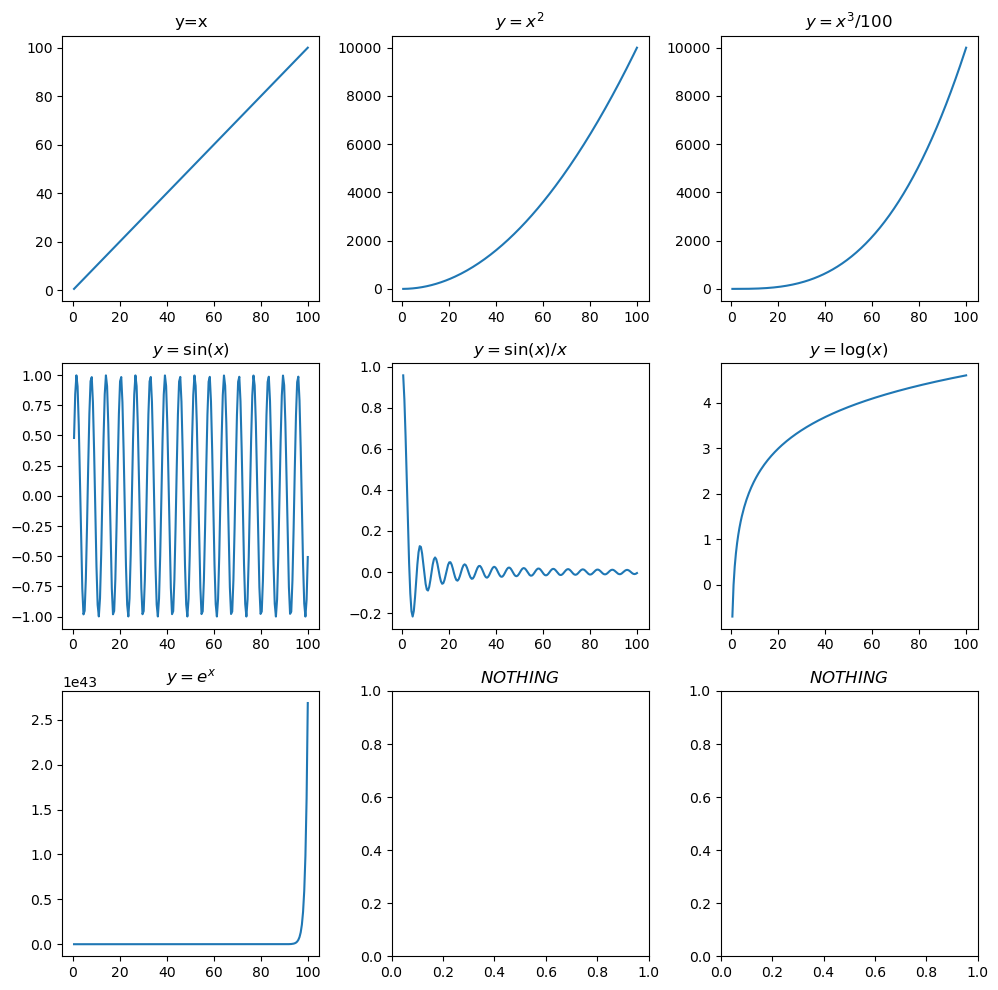

In [497]:
import numpy as np
from matplotlib import pyplot as plt

# plt.rcParams["figure.figsize"] = [2, 2]

# x = np.linspace(0.5, 100, 199)
# y = x


figure, axis = plt.subplots(3,3)

plt.rcParams["figure.figsize"] = [10,10]
axis[0,0].plot(x,x)
axis[0,0].set_title("y=x")

axis[0,1].plot(x,x**2)
axis[0,1].set_title("$y=x^{2}$")

axis[0,2].plot(x,(x**3)/100)
axis[0,2].set_title("$y = {x^3}/{100} $")

axis[1,0].plot(x,np.sin(x))
axis[1,0].set_title("$ y = \sin(x)$")

axis[1,1].plot(x,np.sin(x)/x)
axis[1,1].set_title("$y = \sin(x)/x$")

axis[1,2].plot(x,np.log(x))
axis[1,2].set_title("$y = \log(x)$")

axis[2,0].plot(x,np.exp(x))
axis[2,0].set_title("$y = e^{x}$")

axis[2,1].set_title("$NOTHING$")
axis[2,2].set_title("$NOTHING$")
plt.show()

### Question 10

In [498]:
import pandas as pd
ar = np.random.uniform(1,2,(20,5))
# display(ar)

columns = ['a','b','c','d','e']
# row = [i for i in range(1,21)]
df = pd.DataFrame(data = ar,columns = columns)
print(df) #displaying the dataframe

# display(df.mean())
display((df.std()))

display(df.mean(axis = 1))

c = int(np.argmax(np.array(df.std())))
# print(c)
r = int(np.argmin(np.array(df.mean(axis = 0))))

print(f"In the current execution, the column with highest standard deviation is {chr(ord('a')+c)}th column, and the row with lowest mean is {r}th row")

           a         b         c         d         e
0   1.039566  1.428169  1.302741  1.790170  1.196833
1   1.737954  1.278228  1.008390  1.485451  1.639538
2   1.429683  1.177872  1.260113  1.811934  1.105029
3   1.869242  1.105108  1.536090  1.617632  1.422672
4   1.713535  1.447063  1.482182  1.564866  1.484944
5   1.910236  1.302289  1.829401  1.432867  1.027529
6   1.841472  1.409248  1.501106  1.107441  1.265059
7   1.809055  1.153400  1.826414  1.070798  1.526054
8   1.002333  1.763191  1.017302  1.594953  1.189832
9   1.403775  1.539785  1.764528  1.270569  1.403500
10  1.440512  1.141041  1.162297  1.906368  1.940418
11  1.386144  1.152853  1.535947  1.659556  1.458483
12  1.182707  1.467044  1.345353  1.985981  1.225903
13  1.587197  1.011261  1.793540  1.315814  1.695062
14  1.886960  1.568313  1.409383  1.993679  1.072810
15  1.606512  1.711827  1.136494  1.793887  1.720622
16  1.438929  1.624608  1.548367  1.701970  1.446371
17  1.240173  1.863409  1.236026  1.703584  1.

a    0.290356
b    0.253185
c    0.260434
d    0.276015
e    0.256754
dtype: float64

0     1.351496
1     1.429912
2     1.356926
3     1.510149
4     1.538518
5     1.500464
6     1.424865
7     1.477144
8     1.313522
9     1.476431
10    1.518127
11    1.438596
12    1.441398
13    1.480575
14    1.586229
15    1.593868
16    1.552049
17    1.486003
18    1.466902
19    1.460566
dtype: float64

In the current execution, the column with highest standard deviation is ath column, and the row with lowest mean is 1th row


The column with highest standard deviation, and the row with lowest mean will change for each execution

### Question 11

**Note:**
1. Run Question 11 Cell only after Question 10 Cell is Run. 
2. Also, if you want to re-run Ques 11 cell again, follow step 1.


In [499]:
bf = df.sum(axis = 1)
df['f'] = bf 
# print(type(df['a'][1]))
bf = ['LT8' if df['f'][i] < 8 else 'GT8' for i in range(20)]
df['g'] = bf
df

,a,b,c,d,e,f,g
0,1.039566,1.428169,1.302741,1.790170,1.196833,6.757479,LT8
1,1.737954,1.278228,1.008390,1.485451,1.639538,7.149561,LT8
2,1.429683,1.177872,1.260113,1.811934,1.105029,6.784631,LT8
3,1.869242,1.105108,1.536090,1.617632,1.422672,7.550744,LT8
4,1.713535,1.447063,1.482182,1.564866,1.484944,7.692589,LT8
5,1.910236,1.302289,1.829401,1.432867,1.027529,7.502322,LT8
6,1.841472,1.409248,1.501106,1.107441,1.265059,7.124326,LT8
7,1.809055,1.153400,1.826414,1.070798,1.526054,7.385720,LT8
8,1.002333,1.763191,1.017302,1.594953,1.189832,6.567612,LT8
9,1.403775,1.539785,1.764528,1.270569,1.403500,7.382157,LT8


In [500]:
sigma_LT8 = df[df['g'] == 'LT8']['f'].std()
sigma_GT8 = df[df['g'] == 'GT8']['f'].std()

print("The standard deviation for LT8's: ",sigma_LT8)
print("The standard deviation for GT8's: ",sigma_GT8)

The standard deviation for LT8's:  0.36716613602660964
The standard deviation for GT8's:  nan


### Question 12

In [501]:
# np.zeros((4))
m = np.random.randint(1,high=10,size = (4,1,3))
n = np.random.randint(1,high=10,size = (4,1))
res = m+n
display(res)
print("shape of m  ",m.shape)
print("shape of n     ",n.shape)
print("shape of res",res.shape)

array([[[10,  7,  7],
        [11,  8,  8],
        [10,  7,  7],
        [13, 10, 10]],

       [[ 9,  7, 10],
        [10,  8, 11],
        [ 9,  7, 10],
        [12, 10, 13]],

       [[ 5,  2,  6],
        [ 6,  3,  7],
        [ 5,  2,  6],
        [ 8,  5,  9]],

       [[10,  7,  9],
        [11,  8, 10],
        [10,  7,  9],
        [13, 10, 12]]])

shape of m   (4, 1, 3)
shape of n      (4, 1)
shape of res (4, 4, 3)


1. The shape of the m is $(4,1,3)$, and shape of n is $(4,1)$.
2. Surprisingly, we got the resultant shape to be $(4,4,3)$.
3. The reason behind this strange behaviour is Broadcasting.
4. To perform the $+$ operation with n of shape $(4,1)$, the np array m stretches its shape to $(4,4,3)$. Similarly, n (assume shape to be $(1,4,3)$) stretches its shape to $(4,4,3)$.
5. Now, they are addable. This stretching method is called Broadcasting.
6. However, it is not applicable to all numpy arrays. 
7. For broadcasting to happen, we should compare their shapes:
>i. They should have same dimension, or<br>
>ii. Either one of them is 1.
8. The shapes $(5,4,3)$ and $(3,1)$ do not broadcast.
>(5,4,3)<br>
>(1,3,1)<br>
>(Y,**N**,Y)

### Question 13

In [502]:
def argmin(ar) :
    ar = ar.flatten()
    res = 51
    j = 0
    for i in range(len(ar)) :
        if ar[i]<res :
            j = i
            res = ar[i]
    return j

In [503]:
ar = [ np.random.uniform(1,50,(10,15,5)) for j in range(5) ]
for i in ar :
    print("explict:  ",argmin(i))
    print("numpy:    ",np.argmin(i))

explict:   154
numpy:     154
explict:   4
numpy:     4
explict:   596
numpy:     596
explict:   569
numpy:     569
explict:   301
numpy:     301


1. The explict argmin function and the numpy argmin function gives the same result.
2. Also, the explict argmin function is limited to one argument only unlike the numpy argmin function

# THE END